# Pediksi Lokasi Lokalisasi Protein pada Bakteri Gram-Negatif

# Pendahuluan


Prediksi lokasi lokalisasi protein pada bakteri Gram-negatif merupakan suatu pendekatan penting dalam bidang bioinformatika dan mikrobiologi struktural. Lokalisasi protein merujuk pada penentuan di mana sebuah protein berada atau berfungsi dalam struktur sel. Pada bakteri Gram-negatif, yang memiliki struktur dinding sel kompleks dengan dua lapisan membran (membran dalam dan membran luar) serta ruang periplasmik di antaranya, pengetahuan tentang lokasi protein menjadi sangat penting untuk memahami fungsinya secara menyeluruh.

Protein dalam bakteri Gram-negatif dapat terlokalisasi di beberapa kompartemen, seperti sitoplasma, membran dalam, periplasma, membran luar, dan lingkungan ekstraseluler. Masing-masing lokasi ini berperan dalam berbagai proses biologis seperti transportasi, sintesis energi, pertahanan terhadap lingkungan, dan interaksi patogen inang. Oleh karena itu, mengetahui lokasi protein tidak hanya membantu mengungkap fungsinya, tetapi juga membuka peluang untuk pengembangan antibiotik baru dan studi patogenisitas mikroba.

# Data Understanding

## Sumber Data

Dataset diambil dari link dibawh ini:

https://archive.ics.uci.edu/dataset/110/yeast

"Sistem Pakar untuk Memprediksi Lokasi Lokalisasi Protein pada Bakteri Gram-Negatif", Kenta Nakai & Minoru Kanehisa, PROTEINS: Struktur, Fungsi, dan Genetika 11:95-110, 1991. Referensi: "Basis Pengetahuan untuk Memprediksi Lokasi Lokalisasi Protein pada Sel Eukariotik", Kenta Nakai & Minoru Kanehisa, Genomics 14:897-911, 1992.



## Pengambilan Data

Mengambil data pada site UCI, perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah. peritah untuk mengambil data dari UCI dataset dapat di lihat ketika menekan tombol import in python pada datase yang diinginkan dan ikuti perintah tersebut agar data dapat diambil dari UCI dataset. Contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berikut:

In [126]:
#install librari ucimlrepo
!pip install ucimlrepo

In [127]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Mengambil dataset Yeast (ID 110 dari UCI ML Repository)
yeast = fetch_ucirepo(id=110)

# Memisahkan fitur dan target dalam bentuk dataframe
X = yeast.data.features
y = yeast.data.targets

# Menggabungkan fitur dan target menjadi satu dataframe
data = yeast.data.original

# Menyimpan dataset asli ke dalam file CSV
data.to_csv("yeast_dataset.csv", index=False)

# Menampilkan informasi tentang kolom dan tipe datanya
print(data.info())

# Menampilkan 5 baris pertama dari dataset
print(data.head())

# Menampilkan metadata (informasi deskriptif dataset)
print("\nMetadata:")
print(yeast.metadata)

# Menampilkan informasi tentang variabel (fitur dan target)
print("\nInformasi Variabel:")
print(yeast.variables)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sequence_Name      1484 non-null   object 
 1   mcg                1484 non-null   float64
 2   gvh                1484 non-null   float64
 3   alm                1484 non-null   float64
 4   mit                1484 non-null   float64
 5   erl                1484 non-null   float64
 6   pox                1484 non-null   float64
 7   vac                1484 non-null   float64
 8   nuc                1484 non-null   float64
 9   localization_site  1484 non-null   object 
dtypes: float64(8), object(2)
memory usage: 116.1+ KB
None
  Sequence_Name   mcg   gvh   alm   mit  erl  pox   vac   nuc  \
0    ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   
1    ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   
2    ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22  

## Eksplorasi Data

In [128]:
display(data)

,Sequence_Name,mcg,gvh,alm,mit,erl,pox,vac,nuc,localization_site
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


### Struktur Dataset

#### Fitur dan Label


In [129]:
# ukuran fitur
data.shape

(1484, 10)

Bedasarkan ukurannya datanya terdapat 1484 data dan terdapat 10 kolom

In [130]:
# jumlah kolom
data.columns

Index(['Sequence_Name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc',
       'localization_site'],
      dtype='object')

Fitur merupakan sebuah atribut atau variabel yang dapat menentukan hasil prediksi atau clustering nantinya.

Fitur yang terdapat pada dataset:
- msg : Skor dari metode McGeoch untuk pengenalan sinyal sekuens.

- gvh : Skor dari metode von Heijne untuk pengenalan sinyal sekuens.

- alm : Skor dari ALOM (membrane-spanning region prediction).

- mit : Skor dari analisis diskriminan terhadap asam amino untuk prediksi mitokondria.

- erl : Apakah ada substring HDEL (sinyal retensi ER).

- pox : Adanya sinyal target peroksisomal di bagian C-terminus.

- vac : Skor dari analisis diskriminan untuk vakuola.

- nuc : Skor dari analisis diskriminan untuk nukleus.

- localization_site : Target atau label klasifikasi, yaitu lokasi akhir protein dalam sel.

In [131]:
# tipe data
data.dtypes

,0
Sequence_Name,object
mcg,float64
gvh,float64
alm,float64
mit,float64
erl,float64
pox,float64
vac,float64
nuc,float64
localization_site,object


Tipe Data fitur yang terdapat pada dataset:
- msg : Float (Numerik).

- gvh : Float (Numerik).

- alm : Float (Numerik).

- mit : Float (Numerik).

- erl : Float (Numerik).

- pox : Float (Numerik).

- vac : Float (Numerik).

- nuc : Float (Numerik).

- localization_site : Object berisi string Label.

#### Identifikasi Kualitas dari Dataset

##### Deteksi Missing Value

Dalam proses analisis data, langkah awal yang sangat penting adalah melakukan deteksi terhadap missing value, yaitu nilai-nilai yang tidak tercatat atau tidak tersedia dalam dataset. Deteksi ini bertujuan untuk mengidentifikasi data yang tidak lengkap, yang dapat memengaruhi akurasi hasil analisis statistik maupun performa model machine learning.

Cara Penanganan jika terdapat Missing Value:
- Mengabaikan dan membuang Missing Data
- Estimasi Parameter
- Imputasi

In [132]:
import pandas as pd

# Detect rows with missing values
rows_with_missing = data[data.isnull().any(axis=1)]
print("Detect Missing Values:")
print(rows_with_missing)

# Detect missing values atau null
missing_values = data.isnull()

# Hitung nilai yang hilang di setiap kolom
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing Value Counts:")
print(missing_counts)

Detect Missing Values:
Empty DataFrame
Columns: [Sequence_Name, mcg, gvh, alm, mit, erl, pox, vac, nuc, localization_site]
Index: []
Missing Value Counts:
Sequence_Name        0
mcg                  0
gvh                  0
alm                  0
mit                  0
erl                  0
pox                  0
vac                  0
nuc                  0
localization_site    0
dtype: int64


Berdasarkan hasil identifikasi bashwa setiap fitur pada dataset ini sudah terbebas atau sudah besih dari nilai null atau missing value sehingga tidak perlu diadakannya proses prepocessing untuk penanganan data yang mmissing.

##### Deteksi Data Outlier

Deteksi outlier adalah proses untuk mengidentifikasi data yang memiliki perilaku atau karakteristik yang sangat berbeda dari sebagian besar data lainnya dalam suatu dataset. Outlier, atau pencilan, merupakan titik data yang jauh menyimpang dari pola umum dan dapat muncul karena berbagai alasan, seperti kesalahan pencatatan, kondisi khusus, atau memang fenomena nyata yang jarang terjadi.

Dalam konteks analisis data, keberadaan outlier sangat penting untuk diperhatikan karena dapat mempengaruhi hasil analisis statistik dan performa model machine learning. Misalnya, dalam regresi linear, satu outlier yang ekstrem dapat menyebabkan garis prediksi menjadi sangat miring dan tidak akurat.

**Salah satu metode untuk deteksi Outlier data yakni metode LOF:**

Local Outlier Factor (LOF) adalah sebuah metode deteksi outlier berbasis kepadatan lokal yang dirancang untuk mengidentifikasi titik data yang memiliki perilaku menyimpang dibandingkan dengan lingkungan sekitarnya. Metode ini diperkenalkan untuk mengatasi keterbatasan pendekatan tradisional yang hanya mengandalkan jarak global tanpa mempertimbangkan variasi lokal dalam distribusi data.

Proses LOF dimulai dengan memilih parameter k yang merepresentasikan jumlah tetangga terdekat yang akan dipertimbangkan. Kemudian, untuk setiap titik data, algoritma menghitung jarak ke tetangga-tetangganya dan menentukan tingkat kepadatan lokal berdasarkan seberapa dekat atau jauh tetangga-tetangga tersebut.

$$
\text{LOF}_k(p) = \frac{1}{|\mathcal{N}_k(p)|} \sum_{o \in \mathcal{N}_k(p)} \frac{\text{lrd}_k(o)}{\text{lrd}_k(p)}
$$

Keterangan:
- \( $mathcal{N}_k(p) $) adalah himpunan **k tetangga terdekat** dari $( p $)
- \( $text{lrd}_k(p) $) adalah **local reachability density** dari $( p $)

di mana:

$$
\text{lrd}_k(p) = \left( \frac{1}{|\mathcal{N}_k(p)|} \sum_{o \in \mathcal{N}_k(p)} \max \left\{ \text{dist}(p, o),\ \text{k-dist}(o) \right\} \right)^{-1}
$$


Keterangan:
- \( $text{dist}(p, o) $) = jarak antara titik $( p $) dan tetangganya $( o $)
- \( $text{k-dist}(o) $) = jarak dari $( o $) ke tetangga ke-k
- Fungsi `max{}` digunakan agar tidak terlalu sensitif terhadap outlier yang jauh


In [133]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# select data numerik
X = data.select_dtypes(include=['float64'])

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

y_pred = lof.fit_predict(X)
data['outlier'] = y_pred
print(data['outlier'].value_counts())

outlier
 1    1409
-1      75
Name: count, dtype: int64


Berdasarkan hasil analisis outlier menggunakan metode LOF terdapat sebnyak 75 data dari total 1484 yang merupakan outlier

#### Visualisasi Data

/tmp/ipython-input-134-2235772104.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='localization_site', data=data, palette='viridis')


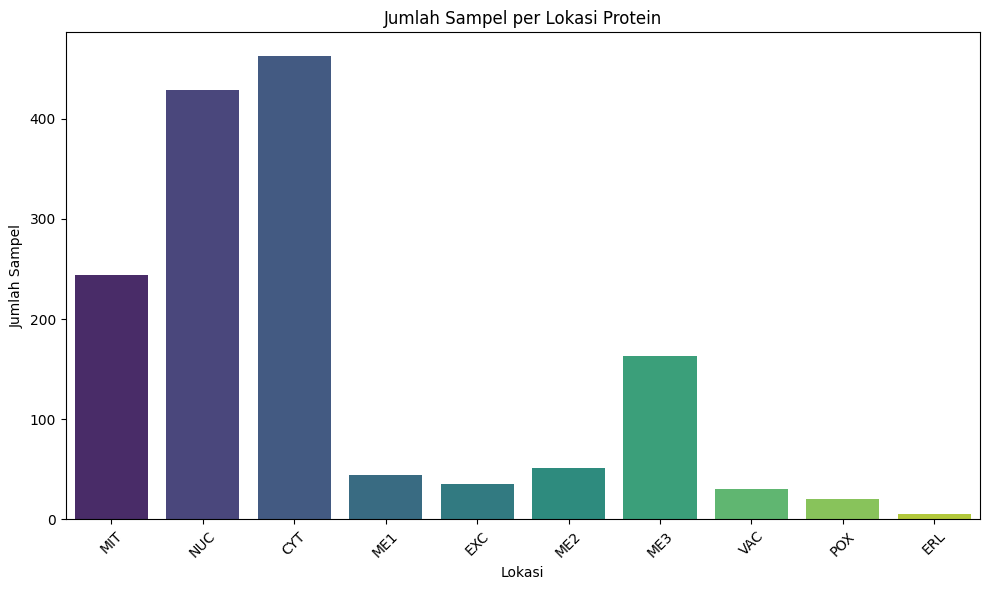

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='localization_site', data=data, palette='viridis')
plt.title('Jumlah Sampel per Lokasi Protein')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

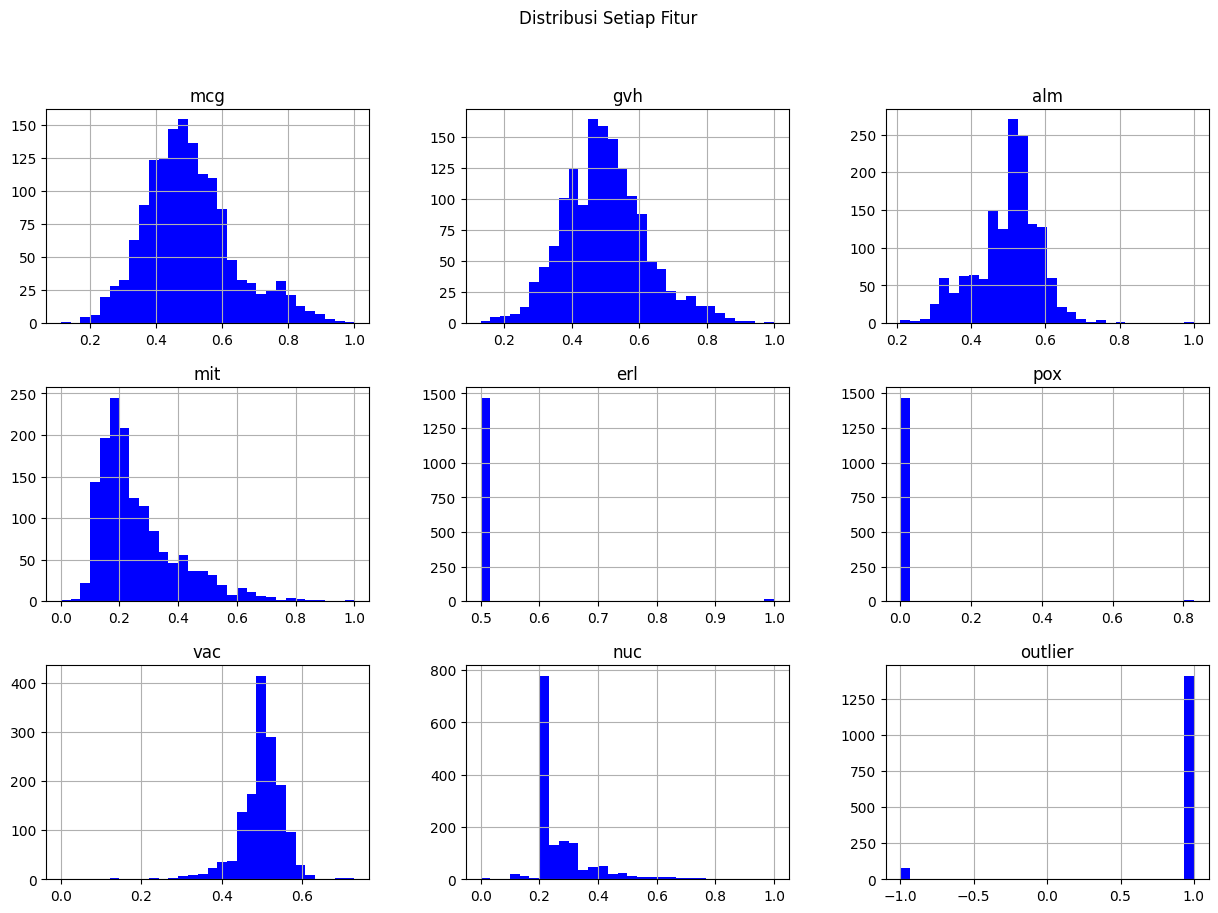

In [135]:
plt.figure(figsize=(12, 10))
data.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle('Distribusi Setiap Fitur')
plt.show()

## Prepocessing Data

### Mengahapus Outlier Pada Data

Setelah ditemukan 75 outlier menggunakan metode LOF maka diperlukan adanya penghapusan pada data tersbut agar tidak mempengaruhi pada proses perhitungan akurasi ataupun klasifikasi pada akhirnya.

Keterangan Outlier:

- Data Outlier disimbolkan dengan (-1)
- Non Outlier (1)

In [136]:
# mengambil data yang bukan -1
data_clean = data[data['outlier'] == 1].copy()

# menghapus column outlier
data_clean.drop(columns='outlier', inplace=True)

print("Jumlah data awal:", len(data))
print("Jumlah data setelah outlier dihapus:", len(data_clean))

Jumlah data awal: 1484
Jumlah data setelah outlier dihapus: 1409


### Min-Max Scaler


Min-Max Scaler adalah salah satu metode normalisasi data yang bertujuan untuk mengubah skala fitur numerik agar berada dalam rentang tertentu, umumnya antara 0 dan 1. Teknik ini digunakan agar semua fitur memiliki kontribusi yang seimbang saat digunakan oleh algoritma pembelajaran mesin.


$$
X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$

Keterangan:
- $(X$) = nilai asli
- $(X_{\min}$) = nilai minimum dari fitur
- $(X_{\max}$) = nilai maksimum dari fitur
- $(X_{\text{scaled}}$) = nilai hasil normalisasi (antara 0 dan 1)

In [137]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Ambil hanya fitur numerik
X = data_clean[['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']]

scaler = MinMaxScaler()

# 3. Fit dan transform data
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 5. (Opsional) gabungkan dengan label jika ingin lihat datanya lengkap
data_scaled = pd.concat([X_scaled_df, data_clean['localization_site'].reset_index(drop=True)], axis=1)

print(data_scaled.head())

        mcg       gvh       alm       mit  erl  pox       vac    nuc  \
0  0.493976  0.571429  0.481481  0.151163  0.0  0.0  0.466667  0.125   
1  0.313253  0.649351  0.500000  0.313953  0.0  0.0  0.577778  0.125   
2  0.566265  0.584416  0.518519  0.174419  0.0  0.0  0.577778  0.125   
3  0.493976  0.350649  0.666667  0.151163  0.0  0.0  0.600000  0.125   
4  0.301205  0.350649  0.500000  0.627907  0.0  0.0  0.466667  0.125   

  localization_site  
0               MIT  
1               MIT  
2               MIT  
3               NUC  
4               MIT  


Setalah proses penghapusan terdapat sebanyak 1409 data yang bersih dari outlier.

## Modelling Klasifikasi Menggunakan Naive Bayes

Proses modeling adalah merupakan suatu tahapan dalam analisis data, di mana kita membangun sebuah model matematis atau algoritma pembelajaran mesin yang dapat mengenali pola dari data, dan menggunakannya untuk membuat prediksi atau keputusan otomatis.

Tujuan dari proses ini adalah untuk mengubah data mentah yang telah diprepocessing menjadi sebuah model yang dapat belajar dari data, lalu digunakan untuk memecahkan masalah tertentu, seperti klasifikasi, regresi, deteksi outlier, dsb.

Pada saat ini, proses modelling akan menggunakan metode Naive Bayes untuk proses Klasifikasinya.

**Naive Bayes** adalah salah satu metode klasifikasi yang sederhana namun sangat efektif dalam dunia pembelajaran mesin (machine learning). Metode ini bekerja berdasarkan prinsip probabilitas, khususnya Teorema Bayes, yang digunakan untuk memperkirakan kemungkinan suatu data termasuk ke dalam sebuah kelas tertentu.

Ciri khas dari metode ini adalah anggapan bahwa setiap fitur (atau atribut) pada data bersifat saling independen, artinya kemunculan satu fitur tidak dipengaruhi oleh fitur lainnya. Meskipun anggapan ini sering kali tidak sepenuhnya benar dalam kenyataan, pendekatan “naive” ini justru membuat perhitungan menjadi lebih sederhana dan efisien, serta tetap menghasilkan performa yang kompetitif dalam banyak kasus.


Teorema Bayes:

$$
P(C \mid X) = \frac{P(X \mid C) \cdot P(C)}{P(X)}
$$


Keterangan:
- $( P(C \mid X) $): **Posterior** – probabilitas kelas $( C $) diberikan data $( X $)
- $( P(X \mid C) $): **Likelihood** – probabilitas data $( X $) muncul jika kelasnya \( C \)
- $( P(C) $): **Prior** – probabilitas awal kelas $( C $) sebelum melihat data
- $( P(X) $): Probabilitas keseluruhan data $( X $) (konstanta untuk semua kelas)




#### Latih Model

In [138]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from ucimlrepo import fetch_ucirepo

# memisahkan atribut dan label
X = data_scaled[['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']]
y = data_scaled['localization_site']

# Membagi dataset menjadi data latih & data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

# membuat model Gaussian naive bayes
model_gnb = GaussianNB()

# Melatih model dengan menggunakan data latih
train = model_gnb.fit(X_train, y_train)

Pada Proses diatas membagi data menjadi dua yakni data untuk testing sebesar 30% dan data untuk untuk trainng sebesar 70%.

#### Proses Klasifikasi

Proses Klasifikasi dilakukan dengan prediksi menggunakan data testing.

In [139]:
y_pred = model_gnb.predict(X_test)
hasil_klasifikasi = X_test.copy()  # ambil fitur data uji
hasil_klasifikasi['label_aktual'] = y_test.values  # label asli
hasil_klasifikasi['label_prediksi'] = y_pred

print(hasil_klasifikasi)

           mcg       gvh       alm       mit  erl  pox       vac       nuc  \
317   0.216867  0.506494  0.277778  0.348837  0.0  0.0  0.577778  0.159091   
587   0.518072  0.376623  0.703704  0.186047  0.0  0.0  0.488889  0.125000   
1156  0.734940  0.727273  0.111111  0.325581  0.0  0.0  0.644444  0.125000   
610   0.433735  0.298701  0.666667  0.139535  0.0  0.0  0.577778  0.238636   
1239  0.421687  0.441558  0.500000  0.139535  0.0  0.0  0.600000  0.227273   
...        ...       ...       ...       ...  ...  ...       ...       ...   
1098  0.433735  0.103896  0.703704  0.313953  0.0  0.0  0.400000  0.170455   
1127  0.156627  0.363636  0.629630  0.220930  0.0  0.0  0.577778  0.329545   
900   0.120482  0.181818  0.629630  0.151163  0.0  0.0  0.511111  0.125000   
165   0.590361  0.363636  0.537037  0.267442  0.0  0.0  0.488889  0.125000   
862   0.361446  0.389610  0.611111  0.220930  0.0  0.0  0.533333  0.250000   

     label_aktual label_prediksi  
317           ME3           

#### Evaluasi

In [140]:
acc_gnb = accuracy_score(y_test, y_pred)
prec_gnb = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec_gnb = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1_gnb = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Menampilkan hasil evaluasi
print(f"Akurasi     : {acc_gnb:.2f}")
print(f"Presisi     : {prec_gnb:.2f}")
print(f"Recall      : {rec_gnb:.2f}")
print(f"F1 Score    : {f1_gnb:.2f}")

Akurasi     : 0.29
Presisi     : 0.57
Recall      : 0.29
F1 Score    : 0.37


## Modelling Klasifikasi Menggunakan KNN (K Nearest Neighbours)

K-Nearest Neighbors (KNN) adalah salah satu algoritma pembelajaran mesin yang digunakan untuk menyelesaikan masalah klasifikasi maupun regresi. KNN bekerja berdasarkan prinsip kesamaan atau kedekatan antara data. Algoritma ini mengklasifikasikan suatu data baru dengan melihat sejumlah tetangga terdekat (dalam hal ini sebanyak K data) dari data tersebut di ruang fitur.

Dalam proses klasifikasi, ketika sebuah data baru diberikan, KNN akan menghitung jarak antara data baru tersebut dengan seluruh data yang ada dalam dataset pelatihan. Setelah itu, KNN akan memilih K data terdekat berdasarkan jarak tersebut, lalu menentukan kelas mayoritas dari K tetangga itu sebagai prediksi label data baru.

Ketika sebuah data baru diberikan, KNN akan menghitung jarak antara data tersebut dengan semua data pelatihan, menggunakan rumus jarak seperti **Euclidean Distance**:

$$
d(x, y) = \sqrt{ \sum_{i=1}^{n} (x_i - y_i)^2 }
$$

Kemudian, algoritma akan memilih $( K $) data dengan jarak terdekat, lalu menentukan **kelas mayoritas** dari tetangga tersebut sebagai prediksi.

Pada kasus ini, sebelum melakukan proses training, data akan di pisah menjadi dua bagian yakni 30% untuk testing dan 70% untuk training. NIlai K yang digunakan sebanyak 5.

#### Latih Model

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# Memisahkan fitur dan label
X = data_scaled[['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']]
y = data_scaled['localization_site']

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Buat model KNN dengan nilai k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Proses Klasifikasi

Proses Klasifikasi dilakukan dengan prediksi menggunakan data testing.

In [142]:
y_pred_knn = knn.predict(X_test)
hasil_klasifikasi = X_test.copy()  # ambil fitur data uji
hasil_klasifikasi['label_aktual'] = y_test.values  # label asli
hasil_klasifikasi['label_prediksi'] = y_pred

print(hasil_klasifikasi)

           mcg       gvh       alm       mit  erl  pox       vac       nuc  \
317   0.216867  0.506494  0.277778  0.348837  0.0  0.0  0.577778  0.159091   
587   0.518072  0.376623  0.703704  0.186047  0.0  0.0  0.488889  0.125000   
1156  0.734940  0.727273  0.111111  0.325581  0.0  0.0  0.644444  0.125000   
610   0.433735  0.298701  0.666667  0.139535  0.0  0.0  0.577778  0.238636   
1239  0.421687  0.441558  0.500000  0.139535  0.0  0.0  0.600000  0.227273   
...        ...       ...       ...       ...  ...  ...       ...       ...   
1098  0.433735  0.103896  0.703704  0.313953  0.0  0.0  0.400000  0.170455   
1127  0.156627  0.363636  0.629630  0.220930  0.0  0.0  0.577778  0.329545   
900   0.120482  0.181818  0.629630  0.151163  0.0  0.0  0.511111  0.125000   
165   0.590361  0.363636  0.537037  0.267442  0.0  0.0  0.488889  0.125000   
862   0.361446  0.389610  0.611111  0.220930  0.0  0.0  0.533333  0.250000   

     label_aktual label_prediksi  
317           ME3           

#### Evaluasi

In [144]:
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
rec_knn = recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)

# Menampilkan hasil evaluasi
print(f"Akurasi     : {acc_knn:.2f}")
print(f"Presisi     : {prec_knn:.2f}")
print(f"Recall      : {rec_knn:.2f}")
print(f"F1 Score    : {f1_knn:.2f}")

Akurasi     : 0.58
Presisi     : 0.60
Recall      : 0.58
F1 Score    : 0.57


## Modelling Klasifikasi Mennggunakan Decision Tree

Decision Tree adalah salah satu algoritma dalam pembelajaran mesin yang digunakan untuk klasifikasi maupun regresi. Algoritma ini bekerja dengan cara membagi data menjadi kelompok-kelompok berdasarkan fitur tertentu melalui serangkaian pertanyaan atau kondisi. Hasil dari proses ini membentuk struktur pohon bercabang, di mana setiap simpul internal mewakili pengujian terhadap suatu fitur, setiap cabang mewakili hasil dari pengujian tersebut, dan setiap daun (leaf) menunjukkan label kelas (pada kasus klasifikasi).


Proses pembentukan pohon dimulai dari akar (root), di mana algoritma akan memilih fitur yang paling baik dalam membagi data. Pemilihan ini biasanya didasarkan pada metrik seperti Gini Impurity atau Entropy (dalam metode ID3/C4.5). Fitur terbaik akan dipilih sebagai pemisah pada level pertama, kemudian data dibagi, dan proses ini diulang secara rekursif sampai mencapai kondisi tertentu (misalnya semua data dalam satu kelompok memiliki label yang sama, atau kedalaman maksimum pohon tercapai).

**Proses yang terdapat pada Decision Tree:**

1. Entropy (Pengukuran Ketidakteraturan)

Entropy digunakan untuk mengukur impuritas (ketidakteraturan) dalam satu set data:

$$
H(S) = - \sum_{i=1}^{n} p_i \log_2(p_i)
$$

di mana:
- $( p_i $): proporsi dari kelas ke-$(i$) dalam himpunan $(S$)
- $( H(S) $): entropy dari himpunan $(S$)


2. Information Gain (Keuntungan Informasi)

Digunakan untuk memilih fitur terbaik dalam pemisahan data:

$$
IG(S, A) = H(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \cdot H(S_v)
$$

di mana:
- $( IG(S, A) $): information gain dari atribut $(A$) terhadap set $(S$)
- $( S_v $): subset dari $(S$) dengan nilai $(A = v$)


3. Gini Index (Alternatif untuk Entropy)

Digunakan dalam algoritma CART untuk mengukur impuritas:

$$
Gini(S) = 1 - \sum_{i=1}^{n} p_i^2
$$

di mana:
- $( p_i $): proporsi kelas ke-$(i$) dalam $(S$)

#### Latih Model

Proses melatih model ini membagi data menjadi dua bagian yang akan digunakan testing dan training

In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Memisahkan fitur dan label
X = data_scaled[['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']]
y = data_scaled['localization_site']

# proses memisahkan data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# menggunakan metode entropy untuk menentukan kemurnian daerah
dec_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)

dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#### Proses Klasifikasi

Proses Klasifikasi dilakukan dengan prediksi menggunakan data testing.

In [147]:
y_pred_dec_tree = dec_tree.predict(X_test)
hasil_klasifikasi = X_test.copy()  # ambil fitur data uji
hasil_klasifikasi['label_aktual'] = y_test.values  # label asli
hasil_klasifikasi['label_prediksi'] = y_pred

print(hasil_klasifikasi)

           mcg       gvh       alm       mit  erl  pox       vac       nuc  \
317   0.216867  0.506494  0.277778  0.348837  0.0  0.0  0.577778  0.159091   
587   0.518072  0.376623  0.703704  0.186047  0.0  0.0  0.488889  0.125000   
1156  0.734940  0.727273  0.111111  0.325581  0.0  0.0  0.644444  0.125000   
610   0.433735  0.298701  0.666667  0.139535  0.0  0.0  0.577778  0.238636   
1239  0.421687  0.441558  0.500000  0.139535  0.0  0.0  0.600000  0.227273   
...        ...       ...       ...       ...  ...  ...       ...       ...   
1098  0.433735  0.103896  0.703704  0.313953  0.0  0.0  0.400000  0.170455   
1127  0.156627  0.363636  0.629630  0.220930  0.0  0.0  0.577778  0.329545   
900   0.120482  0.181818  0.629630  0.151163  0.0  0.0  0.511111  0.125000   
165   0.590361  0.363636  0.537037  0.267442  0.0  0.0  0.488889  0.125000   
862   0.361446  0.389610  0.611111  0.220930  0.0  0.0  0.533333  0.250000   

     label_aktual label_prediksi  
317           ME3           

#### Evaluasi

In [148]:
acc_dec_tree = accuracy_score(y_test, y_pred_dec_tree)
prec_dec_trer = precision_score(y_test, y_pred_dec_tree, average='weighted', zero_division=0)
rec_dec_tree = recall_score(y_test, y_pred_dec_tree, average='weighted', zero_division=0)
f1_dec_tree = f1_score(y_test, y_pred_dec_tree, average='weighted', zero_division=0)

# Menampilkan hasil evaluasi
print(f"Akurasi     : {acc_dec_tree:.2f}")
print(f"Presisi     : {prec_dec_trer:.2f}")
print(f"Recall      : {rec_dec_tree:.2f}")
print(f"F1 Score    : {f1_dec_tree:.2f}")

Akurasi     : 0.53
Presisi     : 0.54
Recall      : 0.53
F1 Score    : 0.53


## Evaluasi

Berdasarkan Hasil Modelling dari ketiga Metode yakni Naive Bayes, KNN, dan Decision Tree hasil akurasi dari masing - masing model yakni:

In [150]:
print(f"akurasi model NB {acc_gnb:.2f}")
print(f"akurasi model knn {acc_knn:.2f}")
print(f"akurasi model Dec Tree {acc_dec_tree:.2f}")

akurasi model NB 0.29
akurasi model knn 0.58
akurasi model Dec Tree 0.53


bahwa model yang paling terbaik untuk melakukan klasifikasi yakni menggunakan model knn